In [25]:
import pandas as pd
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [26]:
df_raw_qc = pd.read_csv('database/datacount_quebec-vermont.csv')
df_raw_uk = pd.read_csv('database/datacount_uk-denmark.csv')
print(df_raw_qc.shape, df_raw_uk.shape)

(3145, 4) (3271, 4)


In [27]:
remove_qc = df_raw_qc.loc[df_raw_qc['count'] == -1]
remove_uk = df_raw_uk.loc[df_raw_uk['count'] == -1]
print(remove_qc.shape[0],remove_uk.shape[0])

33 0


In [28]:
frames = [df_raw_qc, df_raw_uk]
df = pd.concat(frames)
df.shape

(6416, 4)

In [38]:
vgm_url = 'https://en.wikipedia.org/wiki/List_of_moths_of_Great_Britain_(micromoths)'
html_text = requests.get(vgm_url).text
soup = BeautifulSoup(html_text, 'html.parser')
'<li><i><a href="/wiki/Micropterix_tunbergella" title="Micropterix tunbergella">Micropterix tunbergella</a></i>'
li = soup.find('ul')
children = li.findChildren("a" , recursive=False)
for child in children:
    print(child)

In [24]:
df[df['search_species_name'].isin([31, 22, 30, 25, 64])]

,taxon_key_gbif_id,search_species_name,gbif_species_name,count


In [32]:
df.sort_values(by=['count'], ascending=False)

,taxon_key_gbif_id,search_species_name,gbif_species_name,count
75,1732717,Phyllodesma americana,Phyllodesma americana,1001
71,5143107,Drepana arcuata,Drepana arcuata,1001
64,5105365,Euclea delphinii,Euclea delphinii,1001
56,5105603,Lithacodes fasciola,Lithacodes fasciola,1001
590,1810469,Cisseps fulvicollis,Cisseps fulvicollis,1000
...,...,...,...,...
544,-1,Apantesis anna,-1,-1
542,-1,Apantesis phyllira,-1,-1
540,-1,Apantesis arge,-1,-1
1056,-1,Photedes (prov. plcmt.) defecta,-1,-1


/home/deva/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1134: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_data.insert(0, var, comp_col)


ValueError: cannot reindex on an axis with duplicate labels

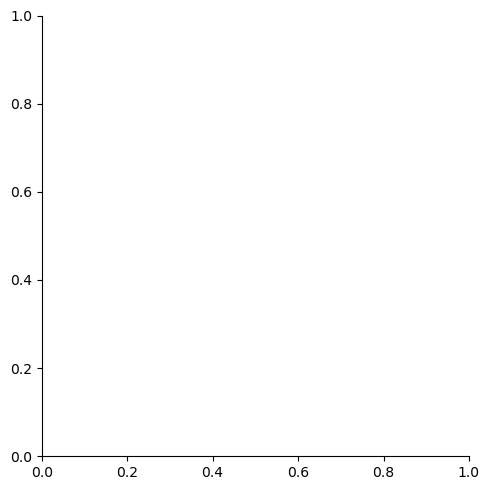

In [40]:
sns.displot(df, y="count", bins=100)


In [33]:
df.loc[df['count'] > 500]

,taxon_key_gbif_id,search_species_name,gbif_species_name,count
56,5105603,Lithacodes fasciola,Lithacodes fasciola,1001
57,5105344,Apoda y-inversum,Apoda y-inversa,672
60,1752825,Prolimacodes badia,Prolimacodes badia,702
64,5105365,Euclea delphinii,Euclea delphinii,1001
66,5105656,Harrisina americana,Harrisina americana,744
...,...,...,...,...
1370,5112377,Xestia smithii,Xestia smithii,596
1415,9544337,Iridopsis defectaria,Anacamptodes defectaria,570
1419,1964041,Probole amicaria,Probole amicaria,821
1437,1798288,Marimatha nigrofimbria,Marimatha nigrofimbria,701
